In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind # for t test for 1 sample
from statsmodels.stats.power import ttest_power # for power of test check

Problem Statement: 1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).


In [2]:
wholesale_cust = pd.read_csv("Wholesale Customer.csv")
wholesale_cust.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
cust_df = wholesale_cust.copy()

In [4]:
cust_df.drop(['Buyer/Spender'],axis=1,inplace =True)

In [5]:
wholesale_cust.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [6]:
cust_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [7]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [8]:
cust_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [9]:
correlation = wholesale_cust.corr()
correlation

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,1.000000,-0.061151,-0.162290,-0.140509,0.053802,-0.134365,-0.101845
Fresh,-0.061151,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,-0.162290,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.140509,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.053802,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.134365,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,-0.101845,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


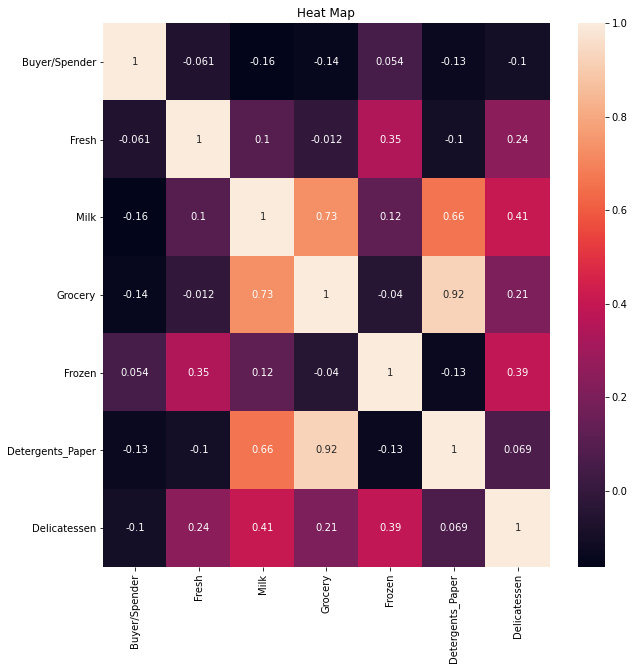

In [10]:
plt.figure(figsize=(10,10))
plt.title("Heat Map")
sns.heatmap(correlation,annot = True)
plt.show()


1.1	Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [11]:
print("Descriptive Statistics of Dataset including channel and regions")
cust_df.describe(include = 'all').T

Descriptive Statistics of Dataset including channel and regions


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [12]:
cust_df['Total']=cust_df['Fresh']+cust_df['Milk']+cust_df['Grocery']+cust_df['Frozen']+cust_df['Detergents_Paper']+cust_df['Delicatessen']

In [13]:
cust_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [14]:
print(cust_df.groupby('Channel')['Total'].sum())
print()
print(cust_df.groupby('Region')['Total'].sum())

Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total, dtype: int64


1.2	There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

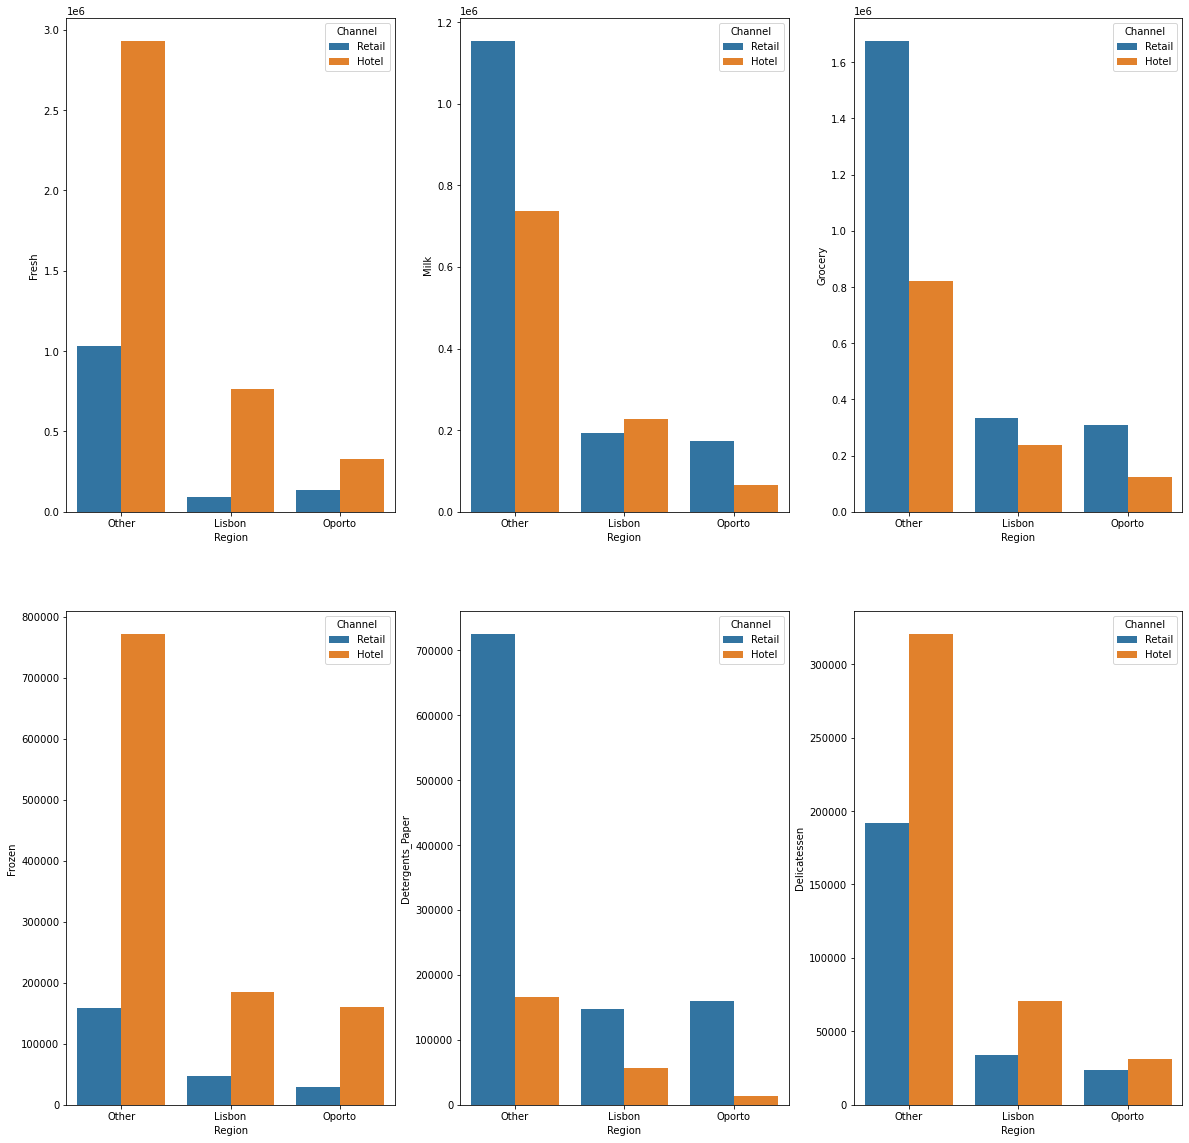

In [15]:
plt.figure(figsize = (20,20))

plt.subplot(2,3,1)
sns.barplot(x = cust_df['Region'], y = cust_df['Fresh'],hue=cust_df['Channel'],estimator=np.sum,ci=None)

plt.subplot(2,3,2)
sns.barplot(x = cust_df['Region'], y = cust_df['Milk'],hue=cust_df['Channel'],estimator=np.sum,ci=None)

plt.subplot(2,3,3)
sns.barplot(x = cust_df['Region'], y = cust_df['Grocery'],hue=cust_df['Channel'],estimator=np.sum,ci=None)

plt.subplot(2,3,4)
sns.barplot(x = cust_df['Region'], y = cust_df['Frozen'],hue=cust_df['Channel'],estimator=np.sum,ci=None)

plt.subplot(2,3,5)
sns.barplot(x = cust_df['Region'], y = cust_df['Detergents_Paper'],hue=cust_df['Channel'],estimator=np.sum,ci=None)

plt.subplot(2,3,6)
sns.barplot(x = cust_df['Region'], y = cust_df['Delicatessen'],hue=cust_df['Channel'],estimator=np.sum,ci=None)

plt.show()

1.3	On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [16]:
print("Standard Deviation of six products :")
print(cust_df.std())


Standard Deviation of six products :
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
Total               26356.301730
dtype: float64


In [17]:
print("Coefficient of Variation:")
cv = lambda x : np.std(x,ddof=1) / np.mean(x)
variation_df = pd.DataFrame(data = cust_df, columns = ['Fresh','Delicatessen','Milk','Grocery','Frozen','Detergents_Paper'])

variation_df.apply(cv)

Coefficient of Variation:


Fresh               1.053918
Delicatessen        1.849407
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
dtype: float64

1.4	Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

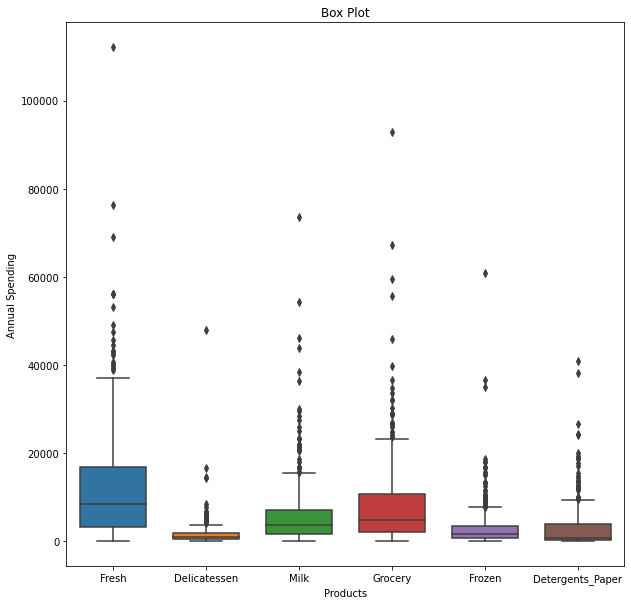

In [18]:
plt.figure(figsize=(10,10))

box_plot = pd.DataFrame(data = cust_df, columns = ['Fresh','Delicatessen','Milk','Grocery','Frozen','Detergents_Paper'])

sns.boxplot(x="variable", y="value", data=pd.melt(box_plot),width = 0.7)
plt.xlabel("Products")
plt.ylabel("Annual Spending")
plt.title("Box Plot")
plt.show()


Problem Statement: 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates


In [19]:
survey = pd.read_csv("Survey-1.csv")
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [20]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [21]:
survey.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

2.1	For this data, construct the following contingency tables (Keep Gender as row variable)

In [22]:
ct_gender_major = pd.crosstab(survey['Gender'],survey['Major'],margins = False)
ct_gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [23]:
ct_gender_grad_intention = pd.crosstab(survey['Gender'],survey['Grad Intention'],margins = False)
ct_gender_grad_intention

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [24]:
ct_gender_employment = pd.crosstab(survey['Gender'],survey['Employment'],margins = False)
ct_gender_employment

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [25]:
ct_gender_computer = pd.crosstab(survey['Gender'],survey['Computer'],margins = False)
ct_gender_computer

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


2.2	Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:



In [26]:
gender_count = survey['Gender'].value_counts()
gender_count

Female    33
Male      29
Name: Gender, dtype: int64

2.2.1	What is the probability that a randomly selected CMSU student will be male?


In [27]:
prob_of_male = gender_count["Male"]/(gender_count["Female"]+gender_count["Male"])
print("Probability percentage of randomly selected CMSU student being male is ",round(prob_of_male * 100,2),"%")

Probability percentage of randomly selected CMSU student being male is  46.77 %



2.2.2	What is the probability that a randomly selected CMSU student will be female?


In [28]:
prob_of_male = gender_count["Female"]/(gender_count["Female"]+gender_count["Male"])
print("Probability percentage of randomly selected CMSU student being female is ",round(prob_of_male * 100,2),"%")

Probability percentage of randomly selected CMSU student being female is  53.23 %


2.3	Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1	Find the conditional probability of different majors among the male students in CMSU.

        Formula to Use :  p(A|B) = p (A ∩ B ) / p(B)




In [29]:
print("Conditional Probability of Accounting Major among Males is : ",round(((ct_gender_major["Accounting"]["Male"] ) / gender_count["Male"])*100,2),"%")

print("Conditional Probability of CIS Major among Males is : ",round(((ct_gender_major["CIS"]["Male"] ) / gender_count["Male"])*100,2),"%")

print("Conditional Probability of Economics/Finance Major among Males is : ",round(((ct_gender_major["Economics/Finance"]["Male"] ) / gender_count["Male"])*100,2),"%")

print("Conditional Probability of International Business Major among Males is : ",round(((ct_gender_major["International Business"]["Male"] ) / gender_count["Male"])*100,2),"%")

print("Conditional Probability of Management Major among Males is : ",round(((ct_gender_major["Management"]["Male"] ) / gender_count["Male"])*100,2),"%")

print("Conditional Probability of Other Major among Males is : ",round(((ct_gender_major["Other"]["Male"] ) / gender_count["Male"])*100,2),"%")

print("Conditional Probability of Retailing/Marketing Major among Males is : ",round(((ct_gender_major["Retailing/Marketing"]["Male"] ) / gender_count["Male"])*100,2),"%")

print("Conditional Probability of Undecided Major among Males is : ",round(((ct_gender_major["Undecided"]["Male"] ) / gender_count["Male"])*100,2),"%")

Conditional Probability of Accounting Major among Males is :  13.79 %
Conditional Probability of CIS Major among Males is :  3.45 %
Conditional Probability of Economics/Finance Major among Males is :  13.79 %
Conditional Probability of International Business Major among Males is :  6.9 %
Conditional Probability of Management Major among Males is :  20.69 %
Conditional Probability of Other Major among Males is :  13.79 %
Conditional Probability of Retailing/Marketing Major among Males is :  17.24 %
Conditional Probability of Undecided Major among Males is :  10.34 %


2.3.2	Find the conditional probability of different majors among the female students of CMSU.

        Formula to Use :  p(A|B) = p (A ∩ B ) / p(B)

In [30]:
print("Conditional Probability of Accounting Major among Females is : ",round(((ct_gender_major["Accounting"]["Female"] ) / gender_count["Female"])*100,2),"%")

print("Conditional Probability of CIS Major among Females is : ",round(((ct_gender_major["CIS"]["Female"] ) / gender_count["Female"])*100,2),"%")

print("Conditional Probability of Economics/Finance Major among Females is : ",round(((ct_gender_major["Economics/Finance"]["Female"] ) / gender_count["Female"])*100,2),"%")

print("Conditional Probability of International Business Major among Females is : ",round(((ct_gender_major["International Business"]["Female"] ) / gender_count["Female"])*100,2),"%")

print("Conditional Probability of Management Major among Females is : ",round(((ct_gender_major["Management"]["Female"] ) / gender_count["Female"])*100,2),"%")

print("Conditional Probability of Other Major among Females is : ",round(((ct_gender_major["Other"]["Female"] ) / gender_count["Female"])*100,2),"%")

print("Conditional Probability of Retailing/Marketing Major among Females is : ",round(((ct_gender_major["Retailing/Marketing"]["Female"] ) / gender_count["Female"])*100,2),"%")

print("Conditional Probability of Undecided Major among Females is : ",round(((ct_gender_major["Undecided"]["Female"] ) / gender_count["Female"])*100,2),"%")

Conditional Probability of Accounting Major among Females is :  9.09 %
Conditional Probability of CIS Major among Females is :  9.09 %
Conditional Probability of Economics/Finance Major among Females is :  21.21 %
Conditional Probability of International Business Major among Females is :  12.12 %
Conditional Probability of Management Major among Females is :  12.12 %
Conditional Probability of Other Major among Females is :  9.09 %
Conditional Probability of Retailing/Marketing Major among Females is :  27.27 %
Conditional Probability of Undecided Major among Females is :  0.0 %


2.4	Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1	Find the probability That a randomly chosen student is a male and intends to graduate.

        For independent varibles P (A and B ) = P(B|A)*P(A)

In [31]:
print("Probability of student chosen is male and intends to graduate is ",round((ct_gender_grad_intention["Yes"]["Male"]/(gender_count["Male"]))*(gender_count["Male"]/(gender_count["Male"]+gender_count["Female"]))*100,2),"%")

Probability of student chosen is male and intends to graduate is  27.42 %


2.4.2	Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [32]:
print("Probability that a randomly selected student is a female and does NOT have a laptop",round(((ct_gender_computer["Tablet"]["Female"]+ct_gender_computer["Desktop"]["Female"])/(gender_count["Female"]))*(gender_count["Female"]/(gender_count["Male"]+gender_count["Female"]))*100,2),"%")

Probability that a randomly selected student is a female and does NOT have a laptop 6.45 %


2.5	Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1	Find the probability that a randomly chosen student is a male or has full-time employment?

P (Male or Full Employed) = P(Male) + P (Full - Employed) – P (Male and Full Employed)

In [33]:
p_of_male = round(gender_count["Male"]/(gender_count["Male"]+gender_count["Female"])*100,2)
p_employed = round(ct_gender_employment["Full-Time"]["Male"]/(gender_count["Male"]+gender_count["Female"])*100,2)
p_male_and_employed = round(ct_gender_employment["Full-Time"]["Male"]/(gender_count["Male"]+gender_count["Female"])*100,2)
p_male_or_employed = p_of_male + p_employed - p_male_and_employed

print("Probability that chosen student is male or has full time employment is",p_male_or_employed,"%")

Probability that chosen student is male or has full time employment is 46.77 %


2.5.2	Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [34]:
p_cp_international_business = round(((ct_gender_major["International Business"]["Female"] ) / gender_count["Female"])*100,2)
p_cp_management = round(((ct_gender_major["Management"]["Female"] ) / gender_count["Female"])*100,2)
p_international_or_management = p_cp_international_business + p_cp_management
print("percentage probability of female student is randomly chosen, she is majoring in international business or management",p_international_or_management,"%")

percentage probability of female student is randomly chosen, she is majoring in international business or management 24.24 %


2.6	Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [35]:
df = ct_gender_grad_intention.copy()
df.drop("Undecided",axis=1,inplace=True)
df

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


2.7	Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
Answer the following questions based on the data




2.7.1	If a student is chosen randomly, what is the probability that his/her GPA is less than 3?


In [36]:
ct_gender_gpa = pd.crosstab(survey['Gender'],survey['GPA'],margins = False)
ct_gender_gpa

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [37]:
p_gpa_less_than3 = 17/62
print("Probability percentage that his/her GPA is less than 3:",round(p_gpa_less_than3*100,2),"%")

Probability percentage that his/her GPA is less than 3: 27.42 %


2.7.2	Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that         a randomly selected female earns 50 or more.

p(A|B) = p (A ∩ B ) / p(B)

In [38]:
ct_gender_salary = pd.crosstab(survey['Gender'],survey['Salary'],margins = False)
ct_gender_salary

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [39]:
p_male_earn_50more = 14/29
print("Conditional Probability percentage that randomly selected male earns 50 or more",round(p_male_earn_50more*100,2),"%")

Conditional Probability percentage that randomly selected male earns 50 or more 48.28 %


In [40]:
p_female_earn_50more = 18/33
print("Conditional Probability percentage that randomly selected female earns 50 or more",round(p_female_earn_50more*100,2),"%")

Conditional Probability percentage that randomly selected female earns 50 or more 54.55 %


2.8	Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [41]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


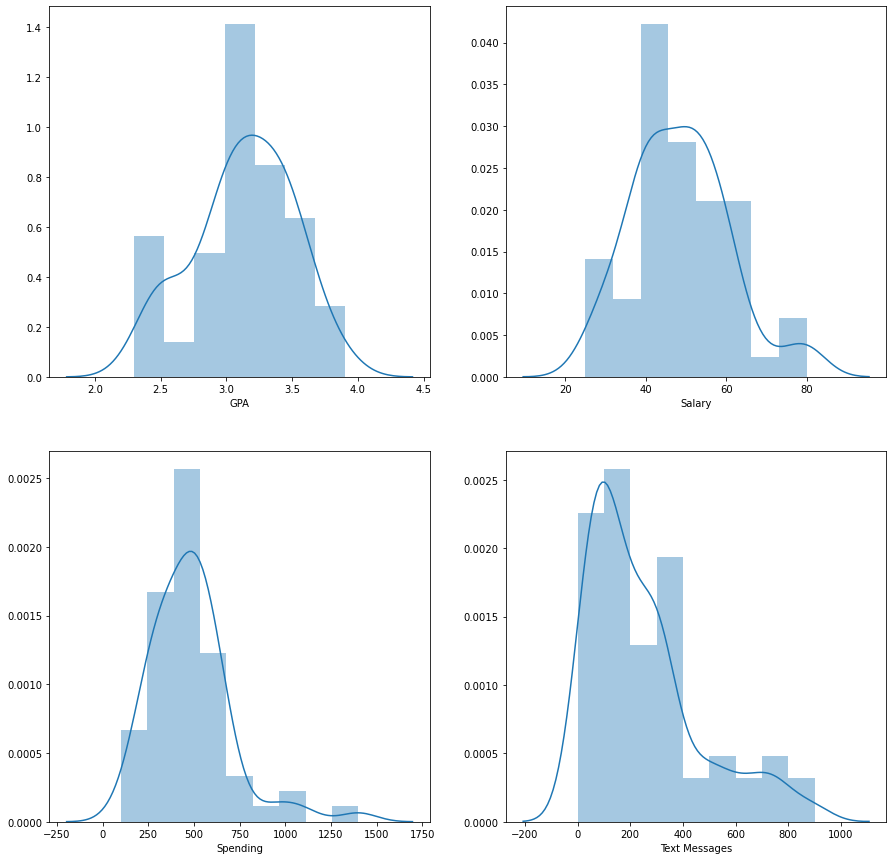

In [42]:
plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
sns.distplot(survey["GPA"])

plt.subplot(2,2,2)
sns.distplot(survey["Salary"])

plt.subplot(2,2,3)
sns.distplot(survey["Spending"])

plt.subplot(2,2,4)
sns.distplot(survey["Text Messages"])


plt.show()

Problem Statement 3 :

In [43]:
shingles_df =  pd.read_csv("A & B shingles-1.csv")
shingles_df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [44]:
shingles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [45]:
shingles_df.isnull().sum()

A    0
B    5
dtype: int64

3.1	Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [46]:
t,p_value = stats.ttest_1samp(shingles_df.A,0.35)

In [47]:
print("For shingles A")
print()
print("t={} and p_value={}".format(round(t,2),round(p_value/2,2)))


For shingles A

t=-1.47 and p_value=0.07


In [48]:
t,p_value = stats.ttest_1samp(shingles_df.B,0.35,nan_policy='omit')

In [49]:
print("For shingles B")
print()
print("t={} and p_value={}".format(round(t,2),round(p_value/2,3)))

For shingles B

t=-3.1 and p_value=0.002


3.2	Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?	

In [50]:
t,p_value=ttest_ind(shingles_df['A'],shingles_df['B'],equal_var=True ,nan_policy='omit')

In [51]:
print("t={} and p_value={}".format(round(t,3),round(p_value,3)))

t=1.29 and p_value=0.202


In [52]:
###END###